# **Persiapan Data**

Pada tahap ini dilakukan proses import library yang diperlukan dan pembacaan dataset training serta testing. Dataset training digunakan untuk membangun model klasifikasi, sedangkan dataset testing digunakan untuk melakukan prediksi nilai kualitas anggur.

In [84]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("data_training.csv")
test = pd.read_csv("data_testing.csv")

train.head()
test.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516


## **PREPROCESSING DATA**

In [85]:
#cek missing value
train.info()
train.isnull().sum()

test.info()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data c

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Pemeriksaan struktur data menggunakan fungsi .info() dan .isnull().sum() menunjukkan bahwa seluruh fitur numerik pada dataset training dan dataset testing tidak memiliki nilai kosong atau missing values.

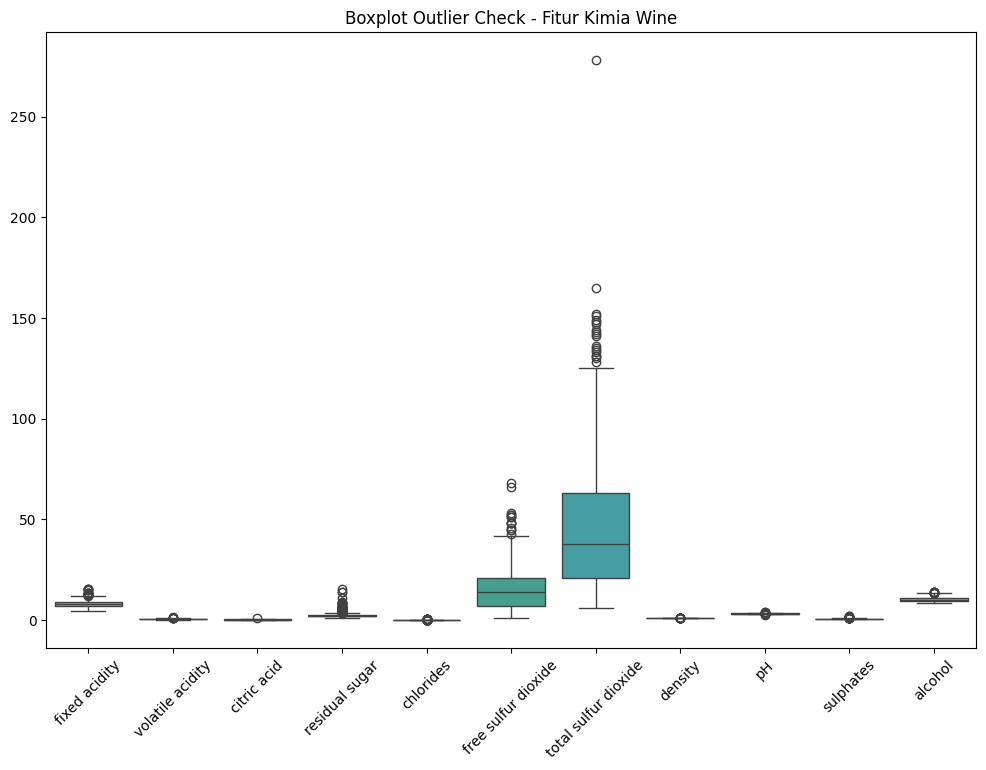

In [86]:
#mengecek outlier dengan boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=train.drop(["quality", "Id"], axis=1))
plt.title("Boxplot Outlier Check - Fitur Kimia Wine")
plt.xticks(rotation=45)
plt.show()


Bersadarkan boxplot, beberapa fitur seperti total sulfur dioxide dan residual sugar memiliki nilai ekstrem yang dapat dianggap sebagai outlier secara statistik. Namun setelah dibandingkan dengan rentang ilmiah dataset wine quality, nilai-nilai tersebut masih berada dalam rentang nyata yang mungkin terjadi. Terutama karena dataset merupakan gabungan wine merah dan putih, outlier tidak dihapus dan hanya dilakukan proses normalisasi sebelum pemodelan.

# **Pemilahan Variabel**

Variabel prediktor (fitur kimia) dipisahkan dari variabel target yaitu kualitas anggur (quality). Kolom Id tidak digunakan dalam pelatihan model karena hanya untuk identifikasi data.

In [87]:
#memisahkan fitur x dan target y
X = train.drop(["quality", "Id"], axis=1)
y = train["quality"]


In [88]:
train.drop(["quality", "Id"], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0
...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


Data training dibagi menjadi data pelatihan dan data validasi menggunakan metode stratifikasi agar proporsi kelas tetap seimbang.

In [89]:
#train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Beberapa model diuji, dan Gradient Boosting menghasilkan akurasi tertinggi. Oleh karena itu digunakan sebagai model final. Standardisasi dilakukan agar semua fitur memiliki skala yang sebanding.

In [90]:
#pelatihan model dan standarisasi
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=42))])

# **Pembuatan Model**

In [91]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

results


KNN Accuracy: 0.4826
SVM Accuracy: 0.5930
RandomForest Accuracy: 0.6047
GradientBoosting Accuracy: 0.6163


{'KNN': 0.48255813953488375,
 'SVM': 0.5930232558139535,
 'RandomForest': 0.6046511627906976,
 'GradientBoosting': 0.6162790697674418}

Pada tahap ini, dataset training dibagi menjadi training set dan validation set dengan stratifikasi berdasarkan variabel target quality. Beberapa algoritma klasifikasi diuji untuk memperoleh model dengan performa terbaik, yaitu K-Nearest Neighbors, Support Vector Machine, Random Forest, dan Gradient Boosting Classifier.

Hasil evaluasi menunjukkan bahwa Gradient Boosting memberikan akurasi tertinggi sebesar 0.6163 pada data validasi, sehingga model tersebut dipilih sebagai model final. Proses fine-tuning hyperparameter dilakukan dengan GridSearchCV, namun tidak meningkatkan performa model sehingga digunakan parameter default pada tahap pelatihan akhir.

# **Evaluasi Model**

Akurasi yang diperoleh sebesar 61.63% dimana angka ini cukup merepresentasikan pola hubungan antar variabel kimia dengan kualitas anggur. Confusion matrix menunjukkan bahwa sebagian besar kesalahan prediksi terjadi pada kelas kualitas berdekatan (misal kualitas 5 terprediksi menjadi 6) dimana hal ini menggambarkan bahwa batas antar kelas memang relatif tipis dalam penilaian kualitas wine.

In [92]:
y_pred = pipeline.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.6162790697674418
[[ 0  0  0  1  0  0]
 [ 0  1  2  1  0  1]
 [ 1  1 54 16  1  0]
 [ 0  1 23 41  3  0]
 [ 0  0  0 13  9  0]
 [ 0  0  0  0  2  1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.20      0.25         5
           5       0.68      0.74      0.71        73
           6       0.57      0.60      0.59        68
           7       0.60      0.41      0.49        22
           8       0.50      0.33      0.40         3

    accuracy                           0.62       172
   macro avg       0.45      0.38      0.41       172
weighted avg       0.61      0.62      0.61       172



In [93]:
params = {
    'model__n_estimators': [150, 200, 250],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [2, 3, 4]
}

pipe_gb = Pipeline([
    ('scale', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

grid = GridSearchCV(pipe_gb, params, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

print("Best Params:", best_params)

y_pred = best_model.predict(X_val)
print("Tuned Accuracy:", accuracy_score(y_val, y_pred))


Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 250}
Tuned Accuracy: 0.5813953488372093


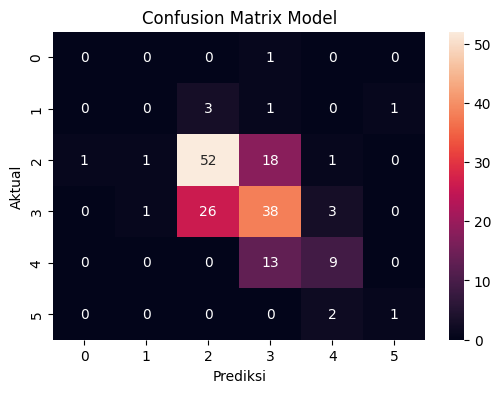

In [94]:
#visualisasi confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix Model")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


# **Prediksi**

Model terbaik dilatih ulang menggunakan seluruh dataset training dan kemudian digunakan untuk memprediksi kualitas anggur pada dataset testting. Hasil prediksi disimpan dalam format csv dengan dua kolom: Id dan quality.

In [95]:
# Train final model using ALL training data
final_model = Pipeline([
    ('scale', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

final_model.fit(X, y)

# Predict testing dataset
test_pred = final_model.predict(test.drop("Id", axis=1))

# Save submission CSV
submission = pd.DataFrame({
    "Id": test["Id"],
    "quality": test_pred
})

submission.to_csv("hasilprediksi_3digitnim.csv", index=False)

submission.head()


,Id,quality
0,222,6
1,1514,6
2,417,5
3,754,5
4,516,5


# **Kesimpulan Akhir**

Berdasarkan sekuruh proses data mining yang telah dilakukan, dapat disimpulkan bahwa model gradient boosting mampu melakukan klasifikasi kualitas wine dengan akurasi cukup baik. Seluruh tahapan telah dilakukan yang dimulai dari preprocessing, pemilihan model, evaluasi, hingga deployment pada data testing.